<a href="https://colab.research.google.com/github/rodmorx/DSP_DT_WS24/blob/main/Untitled1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from datasets import load_dataset

ds = load_dataset("bjoernp/tagesschau-2018-2023")

In [ ]:
pip install transformers datasets torch pandas


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 12.9 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [ ]:
from datasets import load_dataset

# Load dataset from Hugging Face
ds = load_dataset("bjoernp/tagesschau-2018-2023")

# Convert the dataset to a pandas DataFrame for easier processing
df = ds['train'].to_pandas()

# Inspect the dataset
print(df.head())


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/1.50k [00:00<?, ?B/s]

(…)-00000-of-00001-1c2a165f0626c4a6.parquet:   0%|          | 0.00/64.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/21847 [00:00<?, ? examples/s]

         date                                           headline  \
0  2023-04-27                 Türkei-Wahl in Deutschland startet   
1  2023-04-27  Bolsonaro bestreitet Verwicklung in Regierungs...   
2  2023-04-27            Streiten, ob Hilfe wirklich richtig ist   
3  2023-04-27                Republikaner machen Druck auf Biden   
4  2023-04-27  Russland plant Schein-Organisation zur Einflus...   

                            short_headline  \
0           1,5 Millionen Stimmberechtigte   
1                                Brasilien   
2  Afghanistan-Politik der Bundesregierung   
3                       US-Haushaltsstreit   
4                          Strategiepapier   

                                          short_text  \
0  Etwa 1,5 Millionen türkische Staatsbürger in D...   
1  Brasiliens Ex-Präsident Bolsonaro hat eine Ver...   
2  Deutschland hat seine Finanzhilfen für Afghani...   
3  Die Republikaner im US-Kongress wollen Präside...   
4  Russland will offenbar das Them

In [ ]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

# Load the tokenizer and model
model_name = "oliverguhr/german-sentiment-bert"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name)

# Create a sentiment analysis pipeline
sentiment_analyzer = pipeline("text-classification", model=model, tokenizer=tokenizer)


The cache for model files in Transformers v4.22.0 has been updated. Migrating your old cache. This is a one-time only operation. You can interrupt this and resume the migration later on by calling `transformers.utils.move_cache()`.


0it [00:00, ?it/s]

tokenizer_config.json:   0%|          | 0.00/161 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/255k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

In [ ]:
# Convert dataset to pandas DataFrame
df = ds['train'].to_pandas()

# Limit to the first 100 rows
df = df.head(100)
print(df.shape)  # Verify it has 100 rows



(100, 6)


In [ ]:
# Apply sentiment analysis to each article
df['sentiment'] = df['article'].apply(lambda x: sentiment_analyzer(x[:512])[0]['label'])

# Inspect the results
print(df[['article', 'sentiment']].head())


                                             article sentiment
0  Etwa 1,5 Millionen türkische Staatsbürger in D...   neutral
1  Brasiliens Ex-Präsident Bolsonaro hat eine Ver...   neutral
2  Deutschland hat seine Finanzhilfen für Afghani...  negative
3  Die Republikaner im US-Kongress wollen Präside...   neutral
4  Russland will offenbar das Thema Ostseeverschm...   neutral


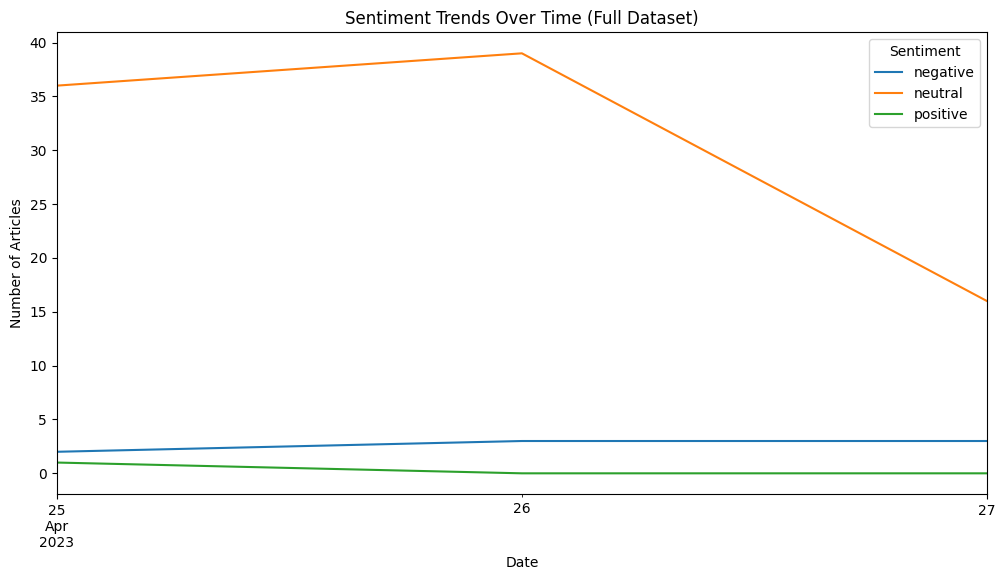

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Ensure the 'date' column is in datetime format
df['date'] = pd.to_datetime(df['date'])

# Group by date and sentiment to count occurrences
sentiment_trends = df.groupby([df['date'].dt.to_period("D"), 'sentiment']).size().unstack()

# Fill missing values with 0 for better visualization
sentiment_trends = sentiment_trends.fillna(0)

# Plot sentiment trends
sentiment_trends.plot(kind='line', figsize=(12, 6))
plt.title("Sentiment Trends Over Time (Full Dataset)")
plt.xlabel("Date")
plt.ylabel("Number of Articles")
plt.legend(title="Sentiment")
plt.show()



In [ ]:
# Define topic keywords
topic_keywords = {
    "Economy": ["Wirtschaft", "Finanzen", "Markt", "Börse", "Inflation", "Investitionen"],
    "Politics": ["Politik", "Regierung", "Partei", "Gesetz", "Minister"],
    "Climate": ["Klima", "Umwelt", "Energie", "Treibhausgase", "Klimawandel"],
    "Technology": ["Technologie", "Digitalisierung", "KI", "Cybersecurity"],
    "Sports": ["Sport", "Fußball", "Olympia", "Tor", "Mannschaft"],
    "Health": ["Gesundheit", "Medizin", "Pandemie", "Krankenhaus", "Pflege"],
    "Culture": ["Kultur", "Kino", "Musik", "Theater", "Kunst"],
    "Crime": ["Kriminalität", "Polizei", "Verbrechen", "Gericht", "Mord"],
    "Beauty": ["Schönheit", "Kleidung", "Schminken", "Make-up", "Schmuck"]
}

# Function to assign topics
def assign_topic(text):
    for topic, keywords in topic_keywords.items():
        if any(keyword in text for keyword in keywords):
            return topic
    return "other"

# Add a 'topic' column
df['topic'] = df['article'].apply(assign_topic)

# Inspect topics
print(df[['article', 'topic']].head())


                                             article     topic
0  Etwa 1,5 Millionen türkische Staatsbürger in D...  Politics
1  Brasiliens Ex-Präsident Bolsonaro hat eine Ver...  Politics
2  Deutschland hat seine Finanzhilfen für Afghani...  Politics
3  Die Republikaner im US-Kongress wollen Präside...  Politics
4  Russland will offenbar das Thema Ostseeverschm...   Economy


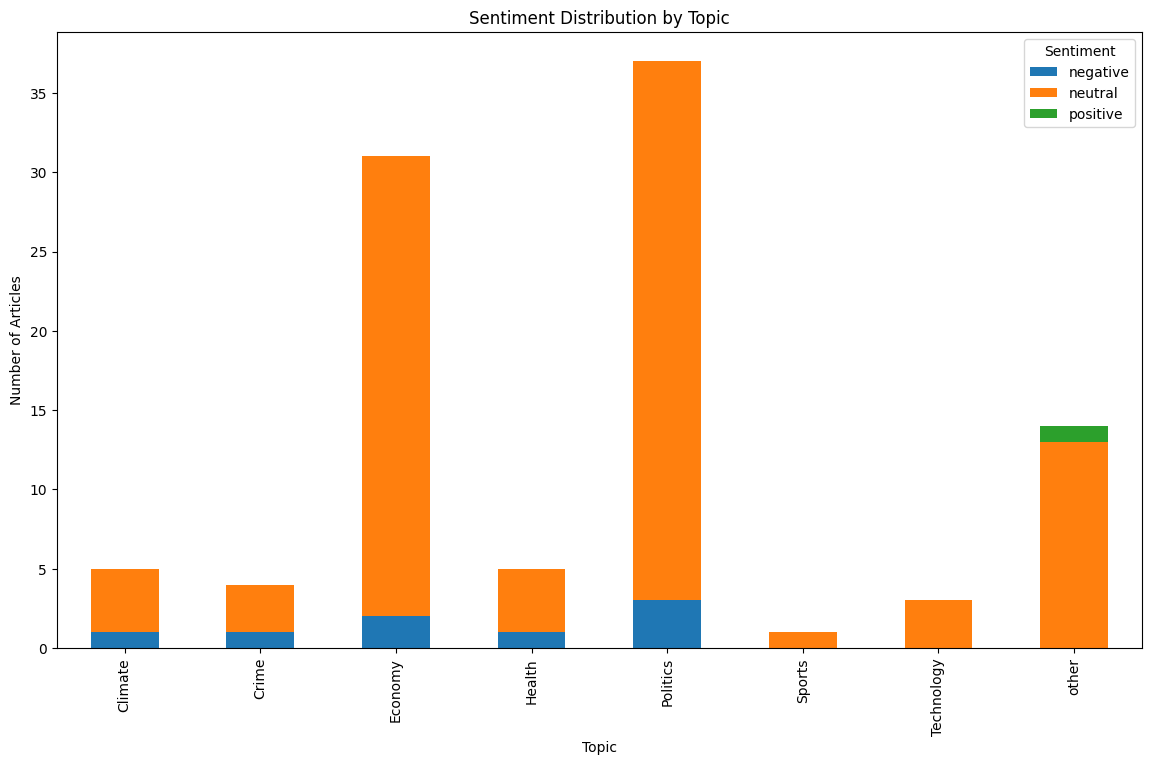

In [ ]:
# Group by topic and sentiment
topic_sentiment = df.groupby(['topic', 'sentiment']).size().unstack()

# Plot sentiment distribution by topic
topic_sentiment.plot(kind='bar', figsize=(14, 8), stacked=True)
plt.title("Sentiment Distribution by Topic")
plt.xlabel("Topic")
plt.ylabel("Number of Articles")
plt.legend(title="Sentiment")
plt.show()


In [ ]:
# Save the processed DataFrame to a CSV file
df.to_csv("processed_tagesschau_dataset.csv", index=False)
